In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import statsmodels
import statsmodels.api as sm #to build linear model

In [4]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

### read the data

In [5]:
bike = pd.read_csv(r'C:\Users\91797\Desktop\day (3).csv')
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [6]:
bike.shape

(730, 16)

In [7]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


categoty data: dteday      
numerical data:instant, temp, atemp, hum, windspeed, casual, registered, cnt, mnth, holiday, weekday, workingday, weathersit  

### Cleaning and Preparation

Instant : Just an indexing column and can be dropped
dteday : As we are not doing a time analysis, so not needed
casual & registered : redundant data as only cnt is required

In [10]:
trash = ['instant', 'dteday', 'casual', 'registered']
bike.drop(trash, axis = 1, inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


Null value


In [11]:
bike.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [12]:
bike.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

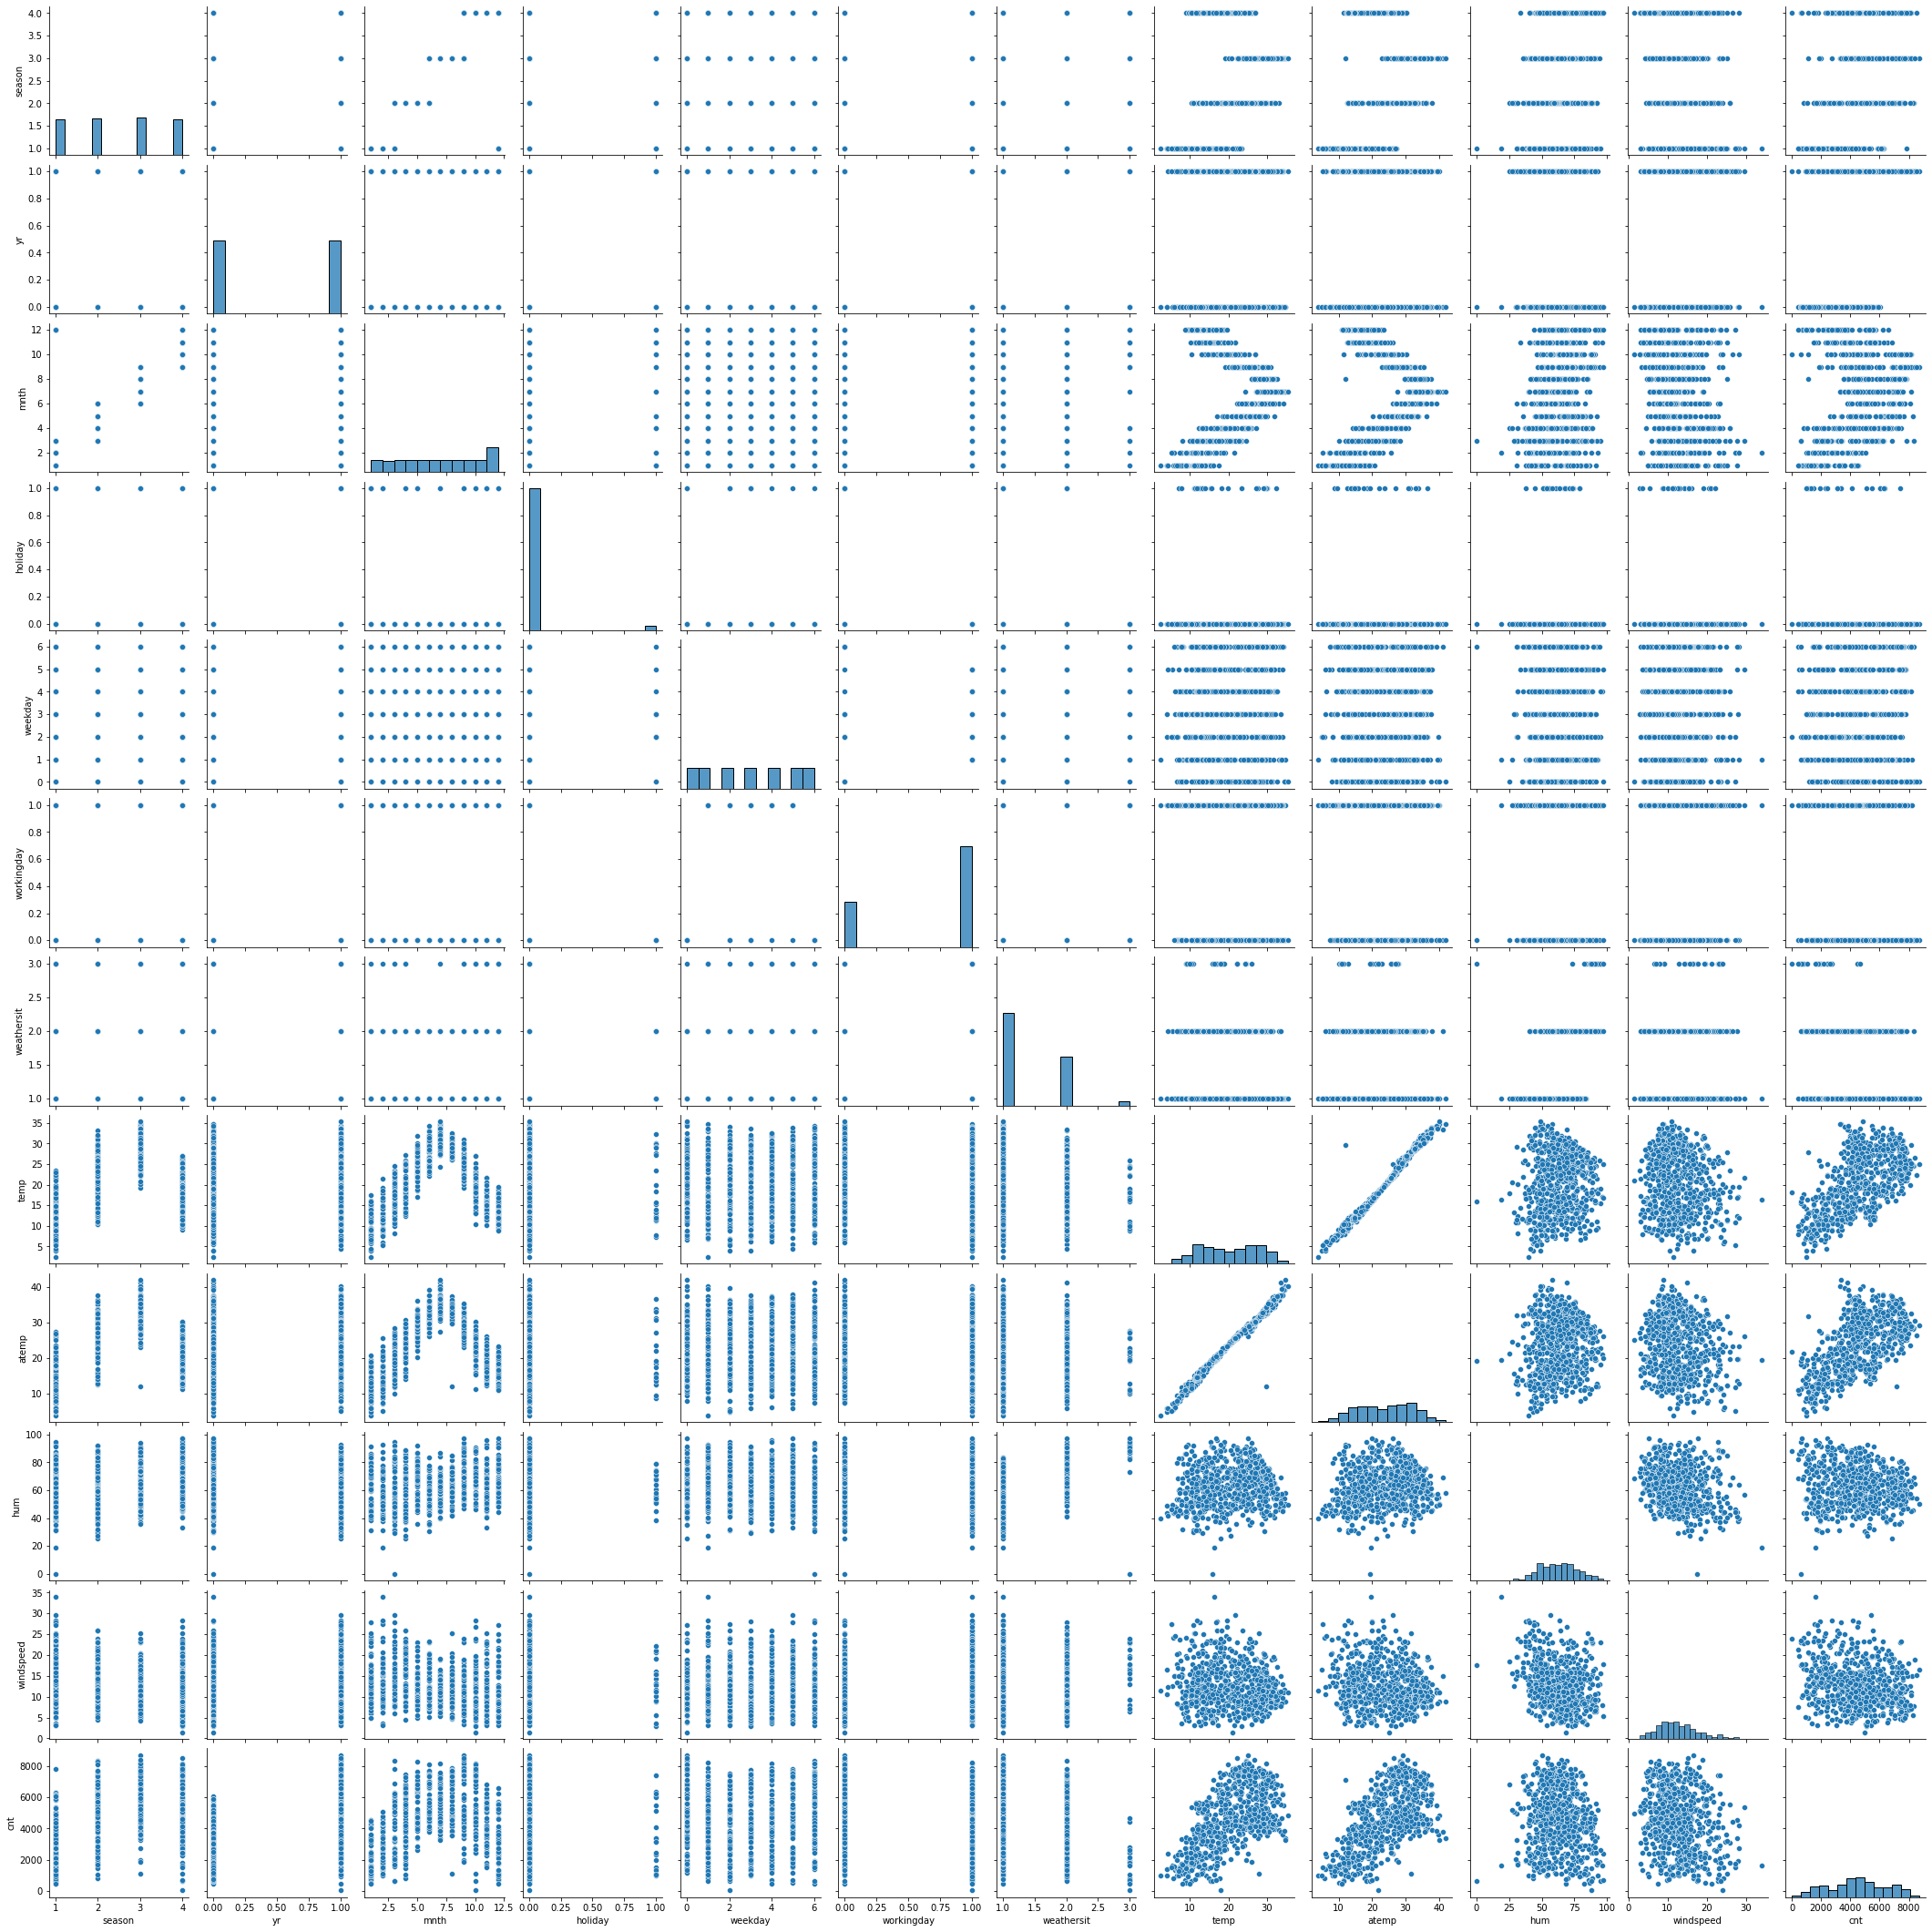

In [13]:
sns.pairplot(bike)
plt.show()

visualization data

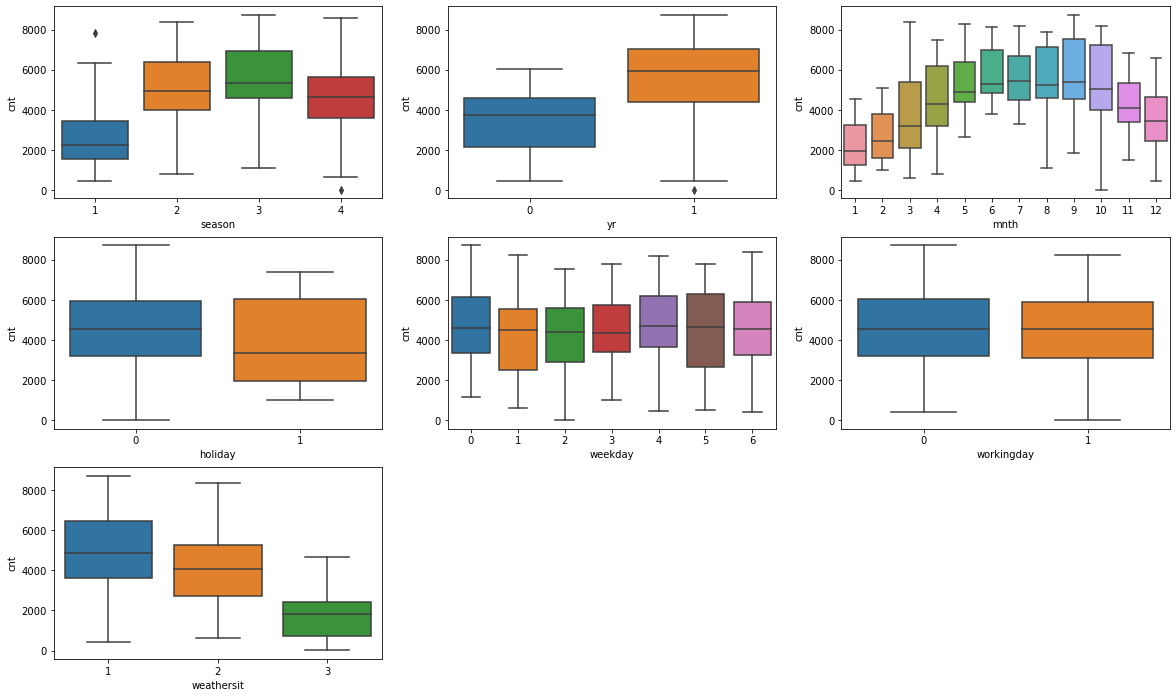

In [14]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bike);
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=bike);
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=bike);
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=bike);
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=bike);
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=bike);
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=bike);

 visualizae with CNT

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

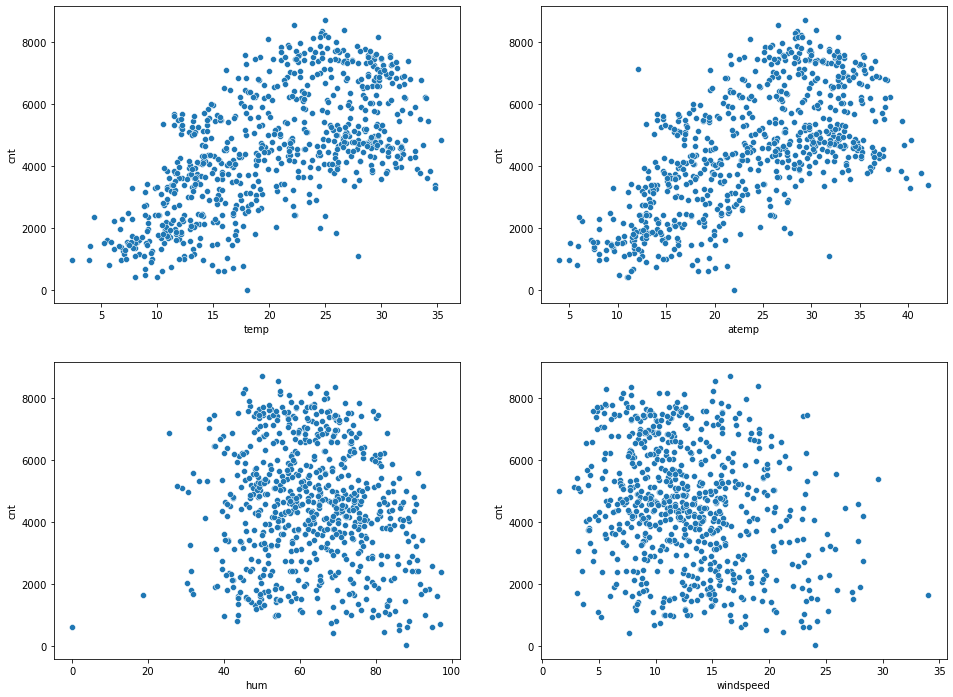

In [15]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1) 
# temp, atemp, hum
sns.scatterplot(x="temp", y="cnt", data=bike)
plt.subplot(2,2,2)
sns.scatterplot(x="atemp", y="cnt", data=bike)
plt.subplot(2,2,3)
sns.scatterplot(x="hum", y="cnt", data=bike)
plt.subplot(2,2,4)
sns.scatterplot(x="windspeed", y="cnt", data=bike)

In [16]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### correlation of numeric variables

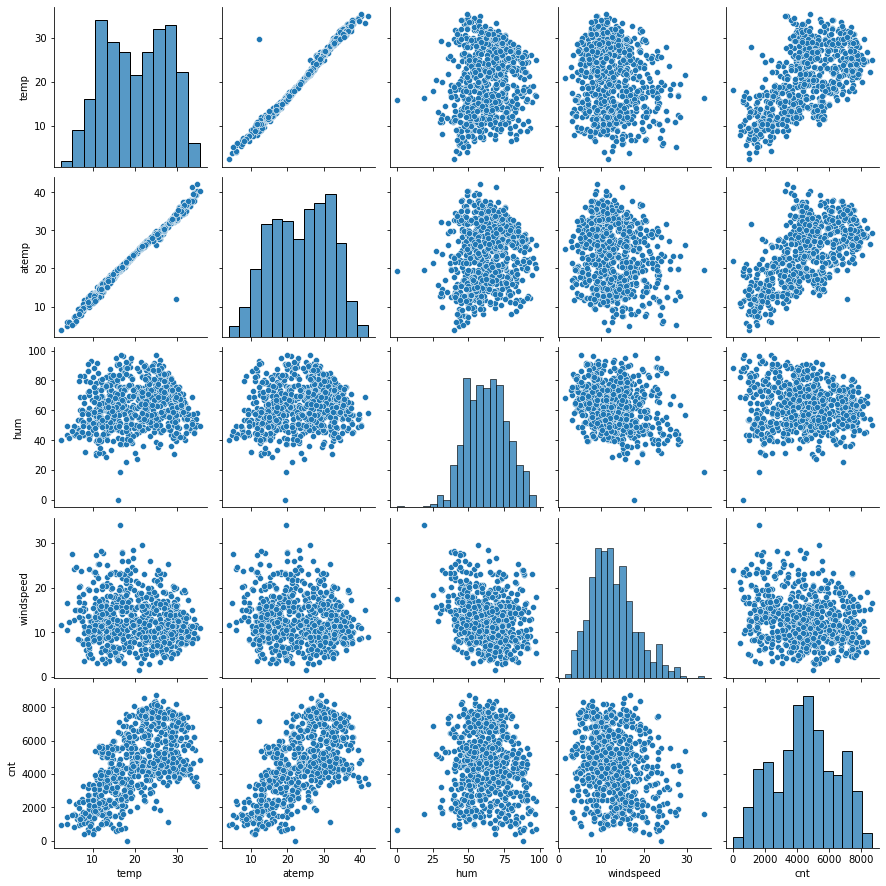

In [17]:
numvars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(bike[numvars])
plt.show()

temp and atemp have similar relations with cnt

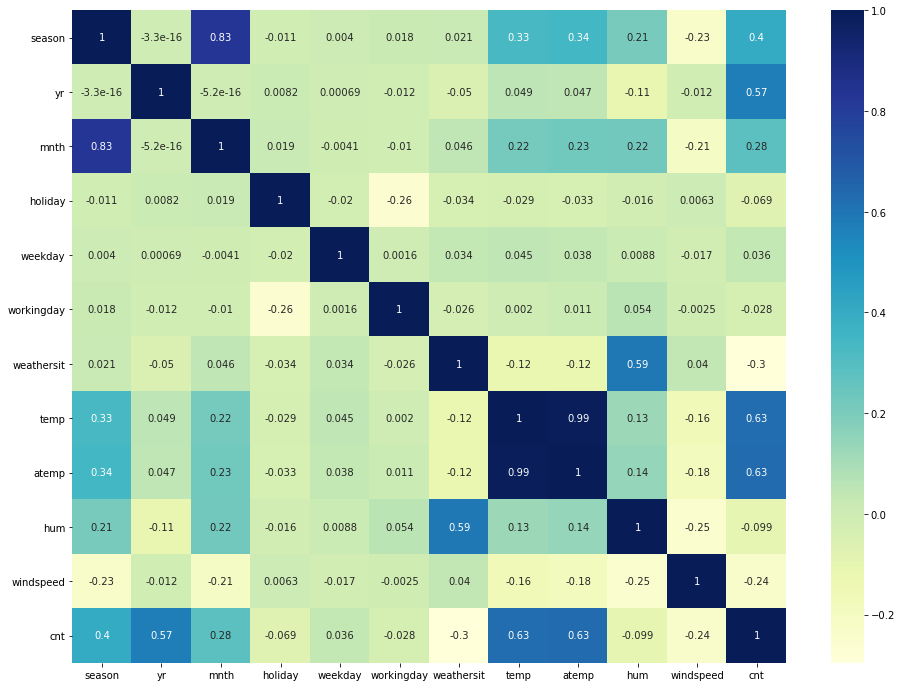

In [18]:
plt.figure(figsize = (16, 12))
sns.heatmap(bike.corr(), annot= True, cmap="YlGnBu")
plt.show()

### Dummy 

In [19]:
seasons = pd.get_dummies(bike.season, drop_first=True)
seasons.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [20]:
seasons = seasons.rename(columns = {2:'summer', 3:'fall', 4:'winter'})
seasons.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [21]:
# Concat seasons with bikes and drop season column
bike = pd.concat([bike, seasons], axis = 1)
bike.drop('season', axis = 1, inplace=True)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [22]:
# Creating dummy variables for mnth

months = pd.get_dummies(bike.mnth, drop_first=True)
months.head()

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [23]:
# Rename columns
months = months.rename(columns={1: 'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8: 'August',
                                9: 'September', 10:'October', 11: 'November', 12: 'December'})
months.head()

,February,March,April,May,June,July,August,September,October,November,December
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# Concat months with bikes and drop mnth column
bike = pd.concat([bike, months], axis = 1)
bike.drop('mnth', axis = 1, inplace=True)
bike.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,March,April,May,June,July,August,September,October,November,December
0,0,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Creating dummy variables for weekday

weekdays = pd.get_dummies(bike.weekday, drop_first=True)
weekdays.head()

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [26]:
# Rename columns
weekdays = weekdays.rename(columns={1:'Monday', 2: 'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
weekdays.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [27]:
# Concat months with bikes and drop mnth column
bike = pd.concat([bike, weekdays], axis = 1)
bike.drop('weekday', axis = 1, inplace=True)
bike.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,...,September,October,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,0,0,1,2,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,2,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
# Creating dummy variables for weathersit

weather = pd.get_dummies(bike.weathersit, drop_first=True)
weather.head()

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [29]:
# Rename columns
weather = weather.rename(columns={2:'weather_2', 3: 'weather_3'})
weather.head()

,weather_2,weather_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [30]:
# Concat months with bikes and drop mnth column
bike = pd.concat([bike, weather], axis = 1)
bike.drop('weathersit', axis = 1, inplace=True)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_2,weather_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   summer      730 non-null    uint8  
 9   fall        730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  February    730 non-null    uint8  
 12  March       730 non-null    uint8  
 13  April       730 non-null    uint8  
 14  May         730 non-null    uint8  
 15  June        730 non-null    uint8  
 16  July        730 non-null    uint8  
 17  August      730 non-null    uint8  
 18  September   730 non-null    uint8  
 19  October     730 non-null    u

### split train and test dataset

In [32]:
bikes_train, bikes_test = train_test_split(bike, train_size = 0.7, random_state = 100)
print(bikes_train.shape)
print(bikes_test.shape)

(510, 30)
(220, 30)


##Rescaling 

In [33]:
scaler  = MinMaxScaler()

#Create a list of numeric variables

numvars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bikes_train[numvars].head()

,temp,atemp,hum,windspeed,cnt
576,29.246653,33.1448,70.4167,11.083475,7216
426,16.980847,20.6746,62.1250,10.792293,4066
728,10.489153,11.5850,48.3333,23.500518,1796
482,15.443347,18.8752,48.9583,8.708325,4220
111,13.803347,16.0977,72.9583,14.707907,1683


In [34]:
# Fit and Transform the data
bikes_train[numvars] = scaler.fit_transform(bikes_train[numvars])
bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_2,weather_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
bikes_train[numvars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


##training

In [36]:
# X_train, y_train
y_train = bikes_train.pop('cnt')
X_train = bikes_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_2,weather_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### How did you validate the assumptions of Linear Regression after building the model on the training set?
#using the LinearRegression function from SciKit Learn for its compatibility with RFE

##RFE

In [37]:
# Running RFE with the output number of the variable equal to 15
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)

# running RFE
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('February', False, 11),
 ('March', True, 1),
 ('April', False, 3),
 ('May', True, 1),
 ('June', False, 2),
 ('July', False, 12),
 ('August', True, 1),
 ('September', True, 1),
 ('October', True, 1),
 ('November', False, 13),
 ('December', False, 14),
 ('Monday', False, 9),
 ('Tuesday', False, 10),
 ('Wednesday', False, 8),
 ('Thursday', False, 6),
 ('Friday', False, 7),
 ('Saturday', False, 15),
 ('weather_2', True, 1),
 ('weather_3', True, 1)]

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'fall', 'winter',
       'March', 'May', 'August', 'September', 'October', 'weather_2',
       'weather_3'],
      dtype='object')

In [40]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'February', 'April', 'June', 'July', 'November',
       'December', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'],
      dtype='object')

### Model creation 

In [41]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Tue, 30 Nov 2021   Prob (F-statistic):          1.00e-188
Time:                        15:35:20   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2374      0.027      8.665      0.0

#p value of fall is high so we can drop it

In [42]:
X_train_new = X_train_rfe.drop(['fall'], axis = 1)

In [43]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 30 Nov 2021   Prob (F-statistic):          3.87e-189
Time:                        15:35:20   Log-Likelihood:                 512.21
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     495   BIC:                            -930.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2367      0.027      8.621      0.0

##all p value less than 0.05, we will check for VIF, Variance Inflation Factor

In [44]:
# Drop const before calculating VIF 
X_train_new = X_train_lm.drop(['const'], axis=1)

# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.87
2,temp,10.03
4,windspeed,3.75
6,winter,2.33
5,summer,2.31
12,weather_2,2.14
0,yr,2.03
8,May,1.62
9,August,1.62
11,October,1.60


#as hum is high, so we can drop it

In [45]:
X_train_new = X.drop('hum', axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.4
Date:                Tue, 30 Nov 2021   Prob (F-statistic):          4.53e-185
Time:                        15:35:20   Log-Likelihood:                 499.77
No. Observations:                 510   AIC:                            -971.5
Df Residuals:                     496   BIC:                            -912.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1285      0.017      7.492      0.0

#p value of oct is high

In [46]:
X_train_new = X_train_lm.drop(['October'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.5
Date:                Tue, 30 Nov 2021   Prob (F-statistic):          1.37e-185
Time:                        15:35:20   Log-Likelihood:                 498.23
No. Observations:                 510   AIC:                            -970.5
Df Residuals:                     497   BIC:                            -915.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1246      0.017      7.313      0.0

In [47]:
X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.12
3,windspeed,3.32
4,summer,2.30
0,yr,2.01
7,May,1.61
8,August,1.60
5,winter,1.53
10,weather_2,1.50
9,September,1.32
6,March,1.22


#temp has high VIF

In [48]:
X_train_new = X_train_lm.drop(['holiday'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.1
Date:                Tue, 30 Nov 2021   Prob (F-statistic):          4.91e-184
Time:                        15:35:21   Log-Likelihood:                 491.73
No. Observations:                 510   AIC:                            -959.5
Df Residuals:                     498   BIC:                            -908.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1192      0.017      6.944      0.0

In [49]:
X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.12
2,windspeed,3.29
3,summer,2.30
0,yr,2.01
6,May,1.61
7,August,1.60
4,winter,1.52
9,weather_2,1.50
8,September,1.32
5,March,1.22


In [52]:
#temp is a variable with high correlation, we can drop next high vif value, i.e., workingday
X_train_new = X.drop('windspeed', axis=1)
X_train_lm2 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     224.8
Date:                Tue, 30 Nov 2021   Prob (F-statistic):          1.14e-177
Time:                        15:45:19   Log-Likelihood:                 473.85
No. Observations:                 510   AIC:                            -925.7
Df Residuals:                     499   BIC:                            -879.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0585      0.014      4.071      0.0

#P value of May is high

In [53]:
X_train_new = X_train_lm2.drop(['May'], axis = 1)

In [54]:
X_train_lm3 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm3).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     249.7
Date:                Tue, 30 Nov 2021   Prob (F-statistic):          1.13e-178
Time:                        15:46:40   Log-Likelihood:                 473.36
No. Observations:                 510   AIC:                            -926.7
Df Residuals:                     500   BIC:                            -884.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0578      0.014      4.027      0.0

In [55]:
X_train_new = X_train_lm3.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.95
0,yr,1.96
2,summer,1.79
5,August,1.58
3,winter,1.48
7,weather_2,1.46
6,September,1.30
4,March,1.12
8,weather_3,1.06


### low VIF and Low P value

## Residual Analysis

In [56]:
y_train_pred = lm.predict(X_train_lm3)
y_train_pred

576    0.736430
426    0.476081
728    0.423659
482    0.526905
111    0.268150
         ...   
578    0.825179
53     0.168942
350    0.264035
79     0.354257
520    0.639137
Length: 510, dtype: float64

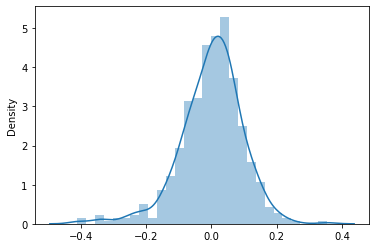

In [57]:
res = y_train - y_train_pred
sns.distplot(res);

### test set

In [58]:
bikes_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_2,weather_3
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,0,0,1,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,1,0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
# Create a list of numeric variables
numvars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bikes_test[numvars] = scaler.transform(bikes_test[numvars])
bikes_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_2,weather_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,1,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
bikes_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_2,weather_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.072727,0.086364,0.118182,0.122727,0.159091,0.140909,0.131818,0.172727,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.260281,0.281541,0.323559,0.328872,0.366595,0.348721,0.339064,0.378873,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### x and y test

In [61]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [62]:
# Making predictions
y_pred = lm.predict(X_test_new)

### final model

Text(0, 0.5, 'y_pred')

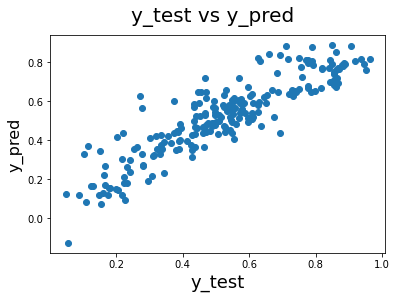

In [63]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [64]:
r2_score(y_true = y_test, y_pred = y_pred)

0.7964591763413581

In [65]:
final_model = pd.concat([X_test_new, y_test], axis =1)
final_model.head()

,const,yr,temp,summer,winter,March,August,September,weather_2,weather_3,cnt
184,1.0,0,0.831783,0,0,0,0,0,1,0,0.692706
535,1.0,1,0.901354,1,0,0,0,0,0,0,0.712034
299,1.0,0,0.511964,0,1,0,0,0,1,0,0.303382
221,1.0,0,0.881625,0,0,0,1,0,0,0,0.547400
152,1.0,0,0.817246,1,0,0,0,0,0,0,0.569029


In [66]:
final_model.describe()

,const,yr,temp,summer,winter,March,August,September,weather_2,weather_3,cnt
count,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,1.0,0.481818,0.558718,0.263636,0.236364,0.054545,0.059091,0.086364,0.318182,0.027273,0.522154
std,0.0,0.500809,0.233187,0.441609,0.425817,0.227609,0.236333,0.281541,0.466833,0.163248,0.219163
min,1.0,0.000000,0.046591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048205
25%,1.0,0.000000,0.355429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.378595
50%,1.0,0.000000,0.558172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524678
75%,1.0,1.000000,0.755981,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.677750
max,1.0,1.000000,0.984424,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.963300


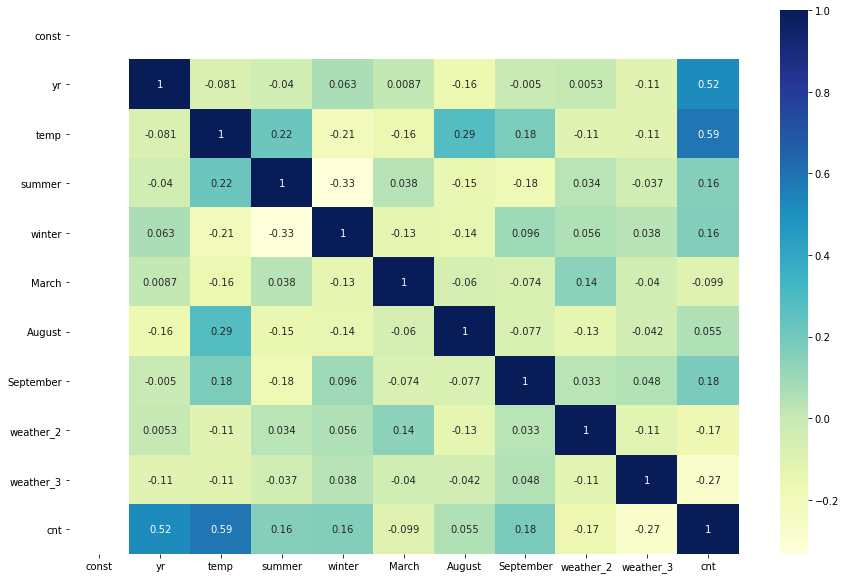

In [67]:
plt.figure(figsize = (15, 10))
sns.heatmap(final_model.corr(), annot= True, cmap="YlGnBu")
plt.show()

#cnt is highly dependent on temp
#Total count of bikes rented increases with the increase in temperature
#cnt is highly correlated with yr
#The number of bikes rented in 2019 has increased from that in 2018. This means that BoomBikes customer base has increased in the past year.
#Negative correlation of weather_2, weather_3 and windspeed:
#When the weather conditions are misty, cloudy, snowy, or rainy the bike rental count decreases. Same happens when the windspeed is high